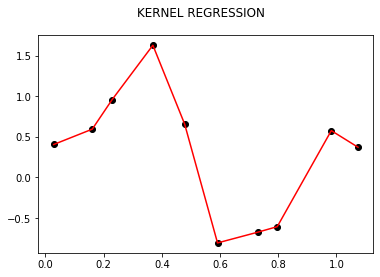

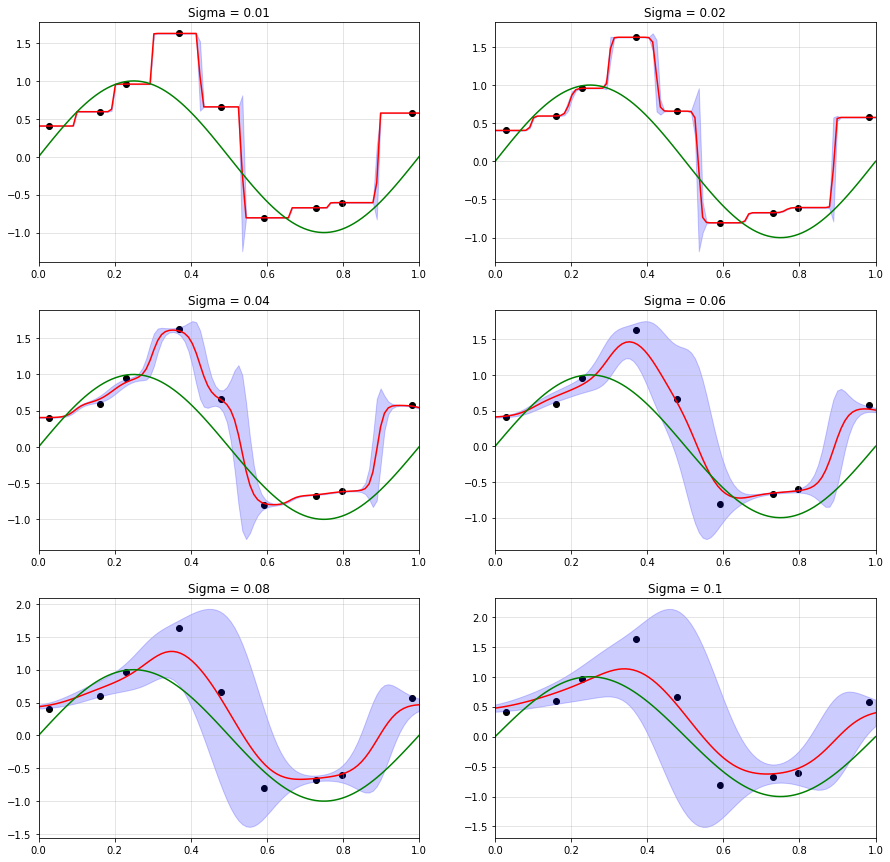

In [ ]:
#KERNEL REGRESSION
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import seed, uniform, randn
from scipy.stats import norm

#10 points (x_i) from the uniform distribution from 0 to 1.then y_i = Sin(2*pi*x_i) + random noise.

def ker_reg(x,X,t,sigma):
    pdf_vals = norm.pdf(x-X.reshape(10,1),loc=0,scale=sigma).T
    pdf_vals = pdf_vals/(pdf_vals.sum(axis = 1,keepdims=True))
    exp= (pdf_vals*t.reshape(1,10)).sum(axis = 1)
    CVar = sigma**2+(pdf_vals*t.reshape(1,10)**2).sum(axis = 1)-exp**2
    return exp,CVar
    
seed(2500) 
X = np.linspace(0,1,10)+uniform(size=10)*0.1
t = np.sin(2*np.pi*X)+randn(10)*0.4
target = np.sin(2*np.pi*X)
plt.scatter(X,t,color='black')
plt.plot(X,t,color ='red')
plt.suptitle(   "KERNEL REGRESSION"  )

plt.show()

x = np.linspace(0,1,100) 
sigmas = [0.01, 0.02, 0.04, 0.06, 0.08 , 0.1]
fig, axes = plt.subplots(3,2, figsize=(15,15))
for sigma, axis in zip(sigmas, axes.ravel()):
    exp,CVar = ker_reg(x,X,t,sigma)
    axis.scatter(X,t,color='black')
    axis.plot(x,exp,color='red',label="True")
    axis.fill_between(x,exp - 2*CVar, exp + 2*CVar, alpha = 0.2, color='BLUE')
    axis.plot(x,np.sin(2*np.pi*x), color="green",label="Mean")
    axis.grid(alpha=0.4)
    axis.set_title("Sigma = "f"{sigma}")
    axis.set_xlim(0,1);